In [1]:
%pylab widget
%load_ext autoreload
%autoreload 2

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
# Read the mhd file from data
from fastcat import patient_data
import fastcat as fc
import numpy as np

from fastcat.fastmc_scatter import write_fastmc_xml_file, run_fastmc_files, write_fastmc_flood_field_xml_file


In [3]:
nrrd_file = 'data/smaller_volume_CNS_CT.nrrd'

fc.utils.nrrd_to_mhd(nrrd_file,force=True)

[2024-03-26 15:50:18,304] {utils.py:494} INFO - Directory smaller_volume_CNS_CT already exists, but is being overwriten


[2024-03-26 15:50:18,375] {utils.py:368} INFO - Loading density data from file
[2024-03-26 15:50:18,380] {utils.py:688} INFO -     Saved SchneiderMaterialsWeight1 atten to file in data/mu_over_rho/SchneiderMaterialsWeight1.csv
[2024-03-26 15:50:18,380] {utils.py:368} INFO - Loading density data from file
[2024-03-26 15:50:18,383] {utils.py:688} INFO -     Saved SchneiderMaterialsWeight2 atten to file in data/mu_over_rho/SchneiderMaterialsWeight2.csv
[2024-03-26 15:50:18,383] {utils.py:368} INFO - Loading density data from file
[2024-03-26 15:50:18,386] {utils.py:688} INFO -     Saved SchneiderMaterialsWeight3 atten to file in data/mu_over_rho/SchneiderMaterialsWeight3.csv
[2024-03-26 15:50:18,387] {utils.py:368} INFO - Loading density data from file
[2024-03-26 15:50:18,390] {utils.py:688} INFO -     Saved SchneiderMaterialsWeight4 atten to file in data/mu_over_rho/SchneiderMaterialsWeight4.csv
[2024-03-26 15:50:18,391] {utils.py:368} INFO - Loading density data from file
[2024-03-26 1

/home/jericho/Software/fastcat/fastcat/spectrum.py:108: RuntimeWarning: divide by zero encountered in log
  log_y = np.log(yy)


In [4]:
phantom = patient_data.patient_phantom(nrrd_file, 1e8)

[2024-03-26 15:50:24,252] {patient_data.py:164} INFO - Found existing directory. Using mhd file smaller_volume_CNS_CT_phantom.mhd
[2024-03-26 15:50:24,257] {utils.py:107} INFO - Using default geometry, DSD = 1510, nDetector = [512, 512], dDetector = [0.784, 0.784]
[2024-03-26 15:50:24,258] {utils.py:368} INFO - Loading density data from file
[2024-03-26 15:50:24,259] {utils.py:425} INFO -     Air atten file already exists, skipping...
[2024-03-26 15:50:24,259] {utils.py:425} INFO -     polyurethane atten file already exists, skipping...
[2024-03-26 15:50:24,259] {utils.py:425} INFO -     teflon atten file already exists, skipping...
[2024-03-26 15:50:24,260] {utils.py:425} INFO -     pmp atten file already exists, skipping...
[2024-03-26 15:50:24,260] {utils.py:425} INFO -     bone50 atten file already exists, skipping...
[2024-03-26 15:50:24,260] {utils.py:425} INFO -     ldpe atten file already exists, skipping...
[2024-03-26 15:50:24,260] {utils.py:425} INFO -     polystyrene atten 

In [135]:
# print(phantom)

In [5]:
spectrum = fc.calculate_spectrum_sp(120,12)
spectrum.write_dat_file('spectrum.dat')

In [6]:
phantom.initialize_fastmc(2,spectrum)

[2024-03-26 15:50:28,896] {patient_data.py:236} INFO - Making a list of angles
[2024-03-26 15:50:28,897] {fastmc_scatter.py:68} INFO - Full fan mode - for flood field


[2024-03-26 15:50:28,900] {fastmc_scatter.py:120} INFO - Saving simulation parameters to /home/jericho/Software/fastcat/fastcat/data/user_phantoms/smaller_volume_CNS_CT/fastmc_simulation_3/fastmc_1e08_10angles.pkl
[2024-03-26 15:50:28,929] {fastmc_scatter.py:125} INFO - Done saving simulation parameters to /home/jericho/Software/fastcat/fastcat/data/user_phantoms/smaller_volume_CNS_CT/fastmc_output_3/fastmc_00.0_flood.pkl
[2024-03-26 15:50:28,930] {fastmc_scatter.py:14} INFO - Full fan mode - for projections


In [7]:
phantom.run_fastmc(fastmc_path ='/home/jericho/Downloads/FastMC_Jan_05/FastMC_install/bin/FastMC')

[2024-03-26 15:50:32,495] {fastmc_scatter.py:144} INFO - Running fastmc_0.00.fmc


Read Parameters..../home/jericho/Software/fastcat/fastcat/data/user_phantoms/smaller_volume_CNS_CT/fastmc_simulation_3/fastmc_0.00.fmc
[FastMC] Reading bowtie file /home/jericho/Software/fastcat/fastcat/data/bowties/full_fan_alt.dat
[FastMC] Filter material found: Al
[FastMC] Al attenuation values loaded [43]
[FastMC] Al density: 2.699 g/cm3
[FastMC] Al filter start angle: -15 deg
[FastMC] Al thickness values: 30
Reading Materials file.../home/jericho/Software/fastcat/fastcat/data/user_phantoms/smaller_volume_CNS_CT/smaller_volume_CNS_CT_materials.txt
[GGEMS GGEMSVolumeCreatorManager::WriteRangeToMaterialFile](0) List of label and material:
[GGEMS GGEMSVolumeCreatorManager::WriteRangeToMaterialFile](0)     * Material: Tungsten, label: 0.000000e+00
[GGEMS GGEMSVolumeCreatorManager::WriteRangeToMaterialFile](0) List of label and material:
[GGEMS GGEMSVolumeCreatorManager::WriteRangeToMaterialFile](0)     * Material: Tungsten, label: 0.000000e+00
[GGEMS GGEMSVolumeCreatorManager::WriteRan

In [8]:
phantom.run_fastcat(1e10,2)

[2024-03-26 15:51:15,782] {patient_data.py:322} INFO - Making a list of angles
[2024-03-26 15:51:15,784] {patient_data.py:350} INFO - Detector matching specifications: CsI-784-micrometer
[2024-03-26 15:51:15,790] {ggems_simulate.py:227} INFO - Initializing filter /home/jericho/Software/fastcat/fastcat/data/bowties/full_fan_alt.dat


[2024-03-26 15:51:15,857] {ggems_simulate.py:626} INFO - Running Simulations
[2024-03-26 15:51:15,858] {ggems_simulate.py:654} INFO -     Simulating 10 keV
[2024-03-26 15:51:16,064] {ggems_simulate.py:654} INFO -     Simulating 20 keV
[2024-03-26 15:51:16,190] {ggems_simulate.py:654} INFO -     Simulating 30 keV
[2024-03-26 15:51:16,302] {ggems_simulate.py:654} INFO -     Simulating 40 keV
[2024-03-26 15:51:16,425] {ggems_simulate.py:654} INFO -     Simulating 50 keV
[2024-03-26 15:51:16,601] {ggems_simulate.py:654} INFO -     Simulating 60 keV
[2024-03-26 15:51:16,735] {ggems_simulate.py:654} INFO -     Simulating 70 keV
[2024-03-26 15:51:16,877] {ggems_simulate.py:654} INFO -     Simulating 80 keV
[2024-03-26 15:51:17,011] {ggems_simulate.py:654} INFO -     Simulating 90 keV
[2024-03-26 15:51:17,143] {ggems_simulate.py:654} INFO -     Simulating 100 keV
[2024-03-26 15:51:17,276] {ggems_simulate.py:889} INFO - Weighting simulations


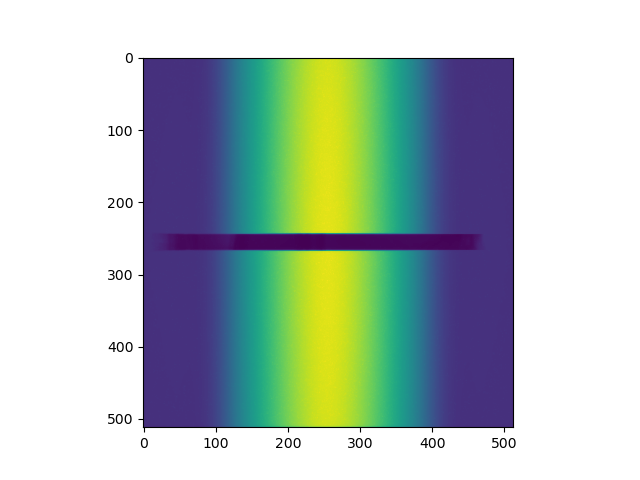

In [9]:
import matplotlib.pyplot as plt
import mpl_interactions as pli

plt.figure()
pli.hyperslicer(phantom.intensity)

In [ ]:
# Read the mhd file from data
from fastcat.ggems_scatter import generate_ggems_bash_script
import fastcat as fc
import numpy as np
from fastcat.fastmc_scatter import write_fastmc_xml_file, run_fastmc_files, write_fastmc_flood_field_xml_file

out_file = '/home/jericho/1-Workspace/1-jupyter_notebooks/2-fastcat_ggems/test'

# 1024 * 768 is the real resolution of the detector

range_file = '/home/jericho/1-Workspace/fastcat_gate/Catphan604_Range.txt'
mhd_file = '/home/jericho/1-Workspace/fastcat_gate/Catphan604.mhd'
material_file = '/home/jericho/1-Workspace/fastcat_gate/Materials.txt'
# material_file = '/home/jericho/1-Workspace/fastcat_ggems/custom_materials_gate.txt'
spectrum_file = '/home/jericho/1-Workspace/1-jupyter_notebooks/4-preliminary_fastmc_projections/spectrum_120kVp_2.75mmAl_0.89mmTi.dat'
# spectrum_file = '/home/jericho/Downloads/FastMC_Jan_05/FastMC_install/bin/data/120kV_2.5mmAl.dat'
# range_file = '/home/jericho/1-Workspace/fastcat_gate/Catphan604_Range.txt'
bowtie_file = '/home/jericho/Downloads/firefox-downloads/full_fan_alt.dat'

# nparticles = 1000000  # 000
out = 'out'

s = fc.Spectrum()
s.load(spectrum_file=spectrum_file)
spectrum = spectrum_file
s_max = s.x.max()

Catphan604_phantom = fc.utils.get_phantom_from_mhd(
    mhd_file, range_file, material_file)

Catphan604_phantom.detector_thickness = 0.6
Catphan604_phantom.detector_thickness2 = 0.8
Catphan604_phantom.detector_material = 'CsI'
Catphan604_phantom.nparticles_per_angle = int(1e10)  # 00 #00
Catphan604_phantom.bowtie_file = bowtie_file
Catphan604_phantom.spectrum_file = spectrum_file
Catphan604_phantom.material_file = material_file
Catphan604_phantom.mhd_file = mhd_file
Catphan604_phantom.range_file = range_file

file_base = '/home/jericho/1-Workspace/1-jupyter_notebooks/4-preliminary_fastmc_projections/test/'
angles = np.linspace(0, np.pi*2, 10, endpoint=False)
fnames = []

Catphan604_phantom.sim_angles = angles
out_dir = '/home/jericho/1-Workspace/1-jupyter_notebooks/4-preliminary_fastmc_projections/out_dir'
sim_dir = '/home/jericho/1-Workspace/1-jupyter_notebooks/4-preliminary_fastmc_projections/sim_dir'

write_fastmc_flood_field_xml_file(phantom=Catphan604_phantom, out_dir=out_dir, sim_dir=sim_dir,
                                  file_name=file_base, half_fan=False)

write_fastmc_xml_file(phantom=Catphan604_phantom, out_dir=out_dir, sim_dir=sim_dir,
                      file_name=file_base, half_fan=False)

run_fastmc_files(
    lib_path='/home/jericho/Downloads/FastMC_Jan_05/FastMC_install/bin/FastMC', sim_dir=sim_dir)